desired z: 4, acheived z:  4.0625


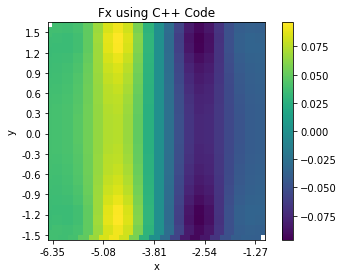

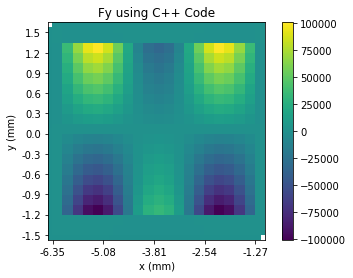

In [27]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import constants
import seaborn as sns

nxy = 21

Ex = []
Ey = []
Bx = []
By = []

z = []
xlocs = []
ylocs = []

f = open(r'C:\\Users\Potoc\NIUSum2021research\FixedcodefromPhilippe\plotForce\correctparamsztar=4\wake_2Dsurf.dat')
for row in f:
    row = row.split(' ')
    z.append(row[2])
    xlocs.append(row[0])
    ylocs.append(row[1])
    Ex.append(row[3])
    Ey.append(row[4])
    Bx.append(row[5])
    By.append(row[6])

print("desired z: 4, acheived z: ", z[0])

xlocs = [float(z) for z in xlocs]
ylocs = [float(z) for z in ylocs]
xaxis = xlocs[0:nxy]
yaxis = ylocs[::nxy]
xaxis = xaxis[::2]
yaxis = yaxis[::2]

Ex = [float(z) for z in Ex]
Ey = [float(z) for z in Ey]
Bx = [float(z) for z in Bx]
By = [float(z) for z in By]

Fxst = [Ex[i] - constants.c*By[i] for i in range(len(Ex))]
Fyst = [Ey[i] + constants.c*Bx[i] for i in range(len(Ey))]
Fx = [Fxst[i:i + nxy] for i in range(0, len(Fxst), nxy)]
Fy = [Fyst[i:i + nxy] for i in range(0, len(Fyst), nxy)]
#print(Fx)
#print(Fy)

fix, ax = plt.subplots()
im = ax.imshow(Fx)
ax.invert_yaxis()
heatmap = plt.pcolor(Fx)
plt.colorbar(heatmap)
plt.title('Fx using C++ Code')
plt.xticks(np.arange(0,nxy,5),xaxis)
plt.yticks(np.arange(0,nxy,2),yaxis)
#plt.xticks(xaxis)
plt.xlabel('x')
plt.ylabel('y')
plt.savefig('z4Fx3Dplot.png')
plt.show()


fix, ax = plt.subplots()
im = ax.imshow(Fy)
ax.invert_yaxis()
heatmap = plt.pcolor(Fy)
plt.colorbar(heatmap)
plt.title('Fy using C++ Code')
plt.xticks(np.arange(0,nxy,5),xaxis)
plt.yticks(np.arange(0,nxy,2),yaxis)
#plt.xticks(xaxis)
plt.xlabel('x (mm)')
plt.ylabel('y (mm)')
plt.savefig('z4Fy3Dplot.png')
plt.show()


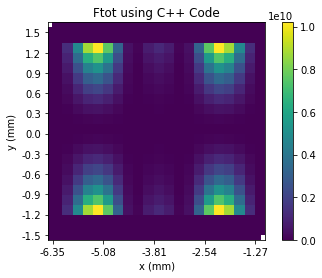

In [29]:
ftot = [Fxst[i]**2+Fyst[i]**2 for i in range(len(Ex))]
ftot = [ftot[i:i + nxy] for i in range(0, len(ftot), nxy)]

fix, ax = plt.subplots()
im = ax.imshow(ftot)
ax.invert_yaxis()
heatmap = plt.pcolor(ftot)
plt.colorbar(heatmap)
plt.title('Ftot using C++ Code')
plt.xticks(np.arange(0,nxy,5),xaxis)
plt.yticks(np.arange(0,nxy,2),yaxis)
#plt.xticks(xaxis)
plt.xlabel('x (mm)')
plt.ylabel('y (mm)')
plt.savefig('z4Ftot3Dplot.png')
plt.show()